# 第8章: ニューラルネット
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ

## 70. 単語ベクトルの和による特徴量

In [1]:
import gensim
text = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin", binary=True)

In [2]:
import numpy as np
import pandas as pd
train_article=pd.read_csv('train.csv')
val_article=pd.read_csv('val.csv')
test_article=pd.read_csv('test.csv')

In [3]:
def create_X_vec(article):
    article_vec_accumulator=np.zeros((len(article),300))
    counter=-1
    for article_list in article.TITLE.tolist():
        article_list=article_list.split(" ")
        counter+=1
        predicted_value=[]
        for word in article_list:
            word=word.replace("'","")
            try:
                predicted_value.append(text[word])
            except KeyError:
                pass
        article_vec_mean=np.array(predicted_value).mean(axis=0)
        article_vec_accumulator[counter,:]=article_vec_mean
    return article_vec_accumulator

In [4]:
category_label_dict={
    "b":0,
    "t":1,
    "e":2,
    "m":3
}

In [5]:
def create_y_sc(article):
    article_sc_accumulator=np.zeros((len(article),1),dtype=int)
    counter=-1
    for category in article.CATEGORY.tolist():
        label_id=category_label_dict[category]
        counter+=1
        article_sc_accumulator[counter,:]=label_id
    return article_sc_accumulator

In [6]:
X_train=create_X_vec(article=train_article)
X_val=create_X_vec(article=val_article)
X_test=create_X_vec(article=test_article)

In [7]:
y_train=create_y_sc(article=train_article)
y_val=create_y_sc(article=val_article)
y_test=create_y_sc(article=test_article)

## 71. 単層ニューラルネットワークによる予測

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'],lr=0.003)

In [11]:
y_pred=model.predict(X_train[:4,:])

## 72. 損失と勾配の計算

In [12]:
y_train_one_hot=np.zeros((len(y_train),4),dtype=int)
for idx in range(len(y_train)):
    y_train_one_hot[idx,:]=np.eye(4)[y_train[idx,:]]
y_val_one_hot=np.zeros((len(y_val),4),dtype=int)
for idx in range(len(y_val)):
    y_val_one_hot[idx,:]=np.eye(4)[y_val[idx,:]]

In [13]:
y_true=y_train_one_hot[:4,:]

In [14]:
from keras import losses
loss=losses.categorical_crossentropy(y_true, y_pred)

In [15]:
loss.numpy()

array([1.4326589, 1.1892002, 1.4689921, 1.3275522], dtype=float32)

In [16]:
from keras import backend as K
variables=X_train[:4,:]
grad=K.gradients(loss, model.inputs)

In [17]:
grad

[None]

## 73. 確率的勾配降下法による学習


In [26]:
model.fit(X_train, y_train_one_hot, epochs=100)

Epoch 1/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.3982 - accuracy: 0.8698
Epoch 2/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.3973 - accuracy: 0.8698
Epoch 3/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.3965 - accuracy: 0.8698
Epoch 4/100
10685/10685 [==============================] - 0s 42us/step - loss: 0.3956 - accuracy: 0.8707
Epoch 5/100
10685/10685 [==============================] - 0s 44us/step - loss: 0.3948 - accuracy: 0.8706
Epoch 6/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.3939 - accuracy: 0.8716
Epoch 7/100
10685/10685 [==============================] - 0s 45us/step - loss: 0.3931 - accuracy: 0.8714
Epoch 8/100
10685/10685 [==============================] - 0s 47us/step - loss: 0.3923 - accuracy: 0.8715
Epoch 9/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.3915 - accuracy: 0.8720
Epoch 10/100
10685/10685 [====================

## 74. 正解率の計測

In [27]:
from sklearn.metrics import accuracy_score
print(f"train acc: {accuracy_score(y_train,model.predict_classes(X_train))}")
print(f"test acc: {accuracy_score(y_test,model.predict_classes(X_test))}")

train acc: 0.8862891904539073
test acc: 0.8921348314606742


In [28]:
X_train.shape

(10685, 300)

## 75. 損失と正解率のプロット

In [43]:
history=model.fit(X_train, y_train_one_hot,
                  validation_data=(X_val, y_val_one_hot), 
                  epochs=100)

Train on 10685 samples, validate on 1336 samples
Epoch 1/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.3091 - accuracy: 0.8970 - val_loss: 0.3155 - val_accuracy: 0.8877
Epoch 2/100
10685/10685 [==============================] - 0s 46us/step - loss: 0.3090 - accuracy: 0.8968 - val_loss: 0.3154 - val_accuracy: 0.8877
Epoch 3/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.3089 - accuracy: 0.8971 - val_loss: 0.3153 - val_accuracy: 0.8877
Epoch 4/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.3088 - accuracy: 0.8971 - val_loss: 0.3153 - val_accuracy: 0.8885
Epoch 5/100
10685/10685 [==============================] - 1s 48us/step - loss: 0.3088 - accuracy: 0.8973 - val_loss: 0.3152 - val_accuracy: 0.8885
Epoch 6/100
10685/10685 [==============================] - 0s 46us/step - loss: 0.3086 - accuracy: 0.8971 - val_loss: 0.3151 - val_accuracy: 0.8877
Epoch 7/100
10685/10685 [==============================] - 1s 5

Epoch 56/100
10685/10685 [==============================] - 0s 44us/step - loss: 0.3041 - accuracy: 0.8988 - val_loss: 0.3116 - val_accuracy: 0.8907
Epoch 57/100
10685/10685 [==============================] - 1s 69us/step - loss: 0.3040 - accuracy: 0.8987 - val_loss: 0.3115 - val_accuracy: 0.8900
Epoch 58/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.3039 - accuracy: 0.8987 - val_loss: 0.3114 - val_accuracy: 0.8907
Epoch 59/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.3038 - accuracy: 0.8984 - val_loss: 0.3114 - val_accuracy: 0.8907
Epoch 60/100
10685/10685 [==============================] - 1s 47us/step - loss: 0.3037 - accuracy: 0.8988 - val_loss: 0.3113 - val_accuracy: 0.8907
Epoch 61/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.3036 - accuracy: 0.8985 - val_loss: 0.3113 - val_accuracy: 0.8907
Epoch 62/100
10685/10685 [==============================] - 1s 48us/step - loss: 0.3035 - accuracy: 0.8985

Text(0, 0.5, 'acc')

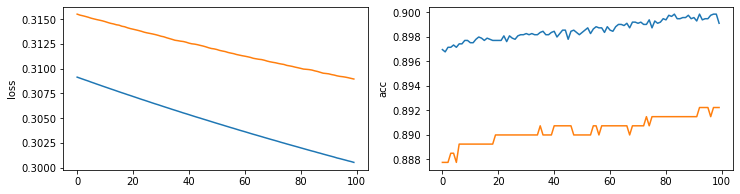

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("loss")
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("acc")

## 76. チェックポイント

In [50]:
from keras.callbacks import ModelCheckpoint
checkpoint =ModelCheckpoint(filepath="model-{epoch:02d}-{val_loss:.2f}.h5", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=50)
history=model.fit(X_train, y_train_one_hot,
                  validation_data=(X_val, y_val_one_hot), 
                  epochs=100,
                 callbacks=[checkpoint])


Train on 10685 samples, validate on 1336 samples
Epoch 1/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.3005 - accuracy: 0.8997 - val_loss: 0.3089 - val_accuracy: 0.8922
Epoch 2/100
10685/10685 [==============================] - 1s 48us/step - loss: 0.3004 - accuracy: 0.9000 - val_loss: 0.3089 - val_accuracy: 0.8922
Epoch 3/100
10685/10685 [==============================] - 1s 47us/step - loss: 0.3003 - accuracy: 0.8996 - val_loss: 0.3088 - val_accuracy: 0.8922
Epoch 4/100
10685/10685 [==============================] - 1s 48us/step - loss: 0.3002 - accuracy: 0.8996 - val_loss: 0.3088 - val_accuracy: 0.8922
Epoch 5/100
10685/10685 [==============================] - 1s 49us/step - loss: 0.3002 - accuracy: 0.8998 - val_loss: 0.3087 - val_accuracy: 0.8922
Epoch 6/100
10685/10685 [==============================] - 1s 47us/step - loss: 0.3001 - accuracy: 0.8998 - val_loss: 0.3086 - val_accuracy: 0.8922
Epoch 7/100
10685/10685 [==============================] - 1s 4

Epoch 56/100
10685/10685 [==============================] - 0s 43us/step - loss: 0.2966 - accuracy: 0.9004 - val_loss: 0.3062 - val_accuracy: 0.8945
Epoch 57/100
10685/10685 [==============================] - 0s 45us/step - loss: 0.2966 - accuracy: 0.9005 - val_loss: 0.3061 - val_accuracy: 0.8945
Epoch 58/100
10685/10685 [==============================] - 0s 44us/step - loss: 0.2965 - accuracy: 0.9007 - val_loss: 0.3061 - val_accuracy: 0.8945
Epoch 59/100
10685/10685 [==============================] - 1s 50us/step - loss: 0.2964 - accuracy: 0.9008 - val_loss: 0.3061 - val_accuracy: 0.8945
Epoch 60/100
10685/10685 [==============================] - 0s 45us/step - loss: 0.2964 - accuracy: 0.9003 - val_loss: 0.3060 - val_accuracy: 0.8952
Epoch 61/100
10685/10685 [==============================] - 0s 46us/step - loss: 0.2963 - accuracy: 0.9007 - val_loss: 0.3060 - val_accuracy: 0.8952
Epoch 62/100
10685/10685 [==============================] - 0s 44us/step - loss: 0.2962 - accuracy: 0.9007

## 77. ミニバッチ化

In [63]:
import time
time_dict={}
for batch_size in [1,2,4,8,16,32,64,128]:
    start_time=time.time()
    history=model.fit(X_train, y_train_one_hot,
                      validation_data=(X_val, y_val_one_hot), 
                      epochs=1,
                     batch_size=batch_size)
    time_dict[batch_size]=time.time()-start_time

Train on 10685 samples, validate on 1336 samples
Epoch 1/1
10685/10685 [==============================] - 15s 1ms/step - loss: 0.2867 - accuracy: 0.9018 - val_loss: 0.3000 - val_accuracy: 0.8930
Train on 10685 samples, validate on 1336 samples
Epoch 1/1
10685/10685 [==============================] - 9s 845us/step - loss: 0.2850 - accuracy: 0.9029 - val_loss: 0.2982 - val_accuracy: 0.8937
Train on 10685 samples, validate on 1336 samples
Epoch 1/1
10685/10685 [==============================] - 4s 392us/step - loss: 0.2841 - accuracy: 0.9035 - val_loss: 0.2986 - val_accuracy: 0.8930
Train on 10685 samples, validate on 1336 samples
Epoch 1/1
10685/10685 [==============================] - 2s 192us/step - loss: 0.2837 - accuracy: 0.9039 - val_loss: 0.2979 - val_accuracy: 0.8922
Train on 10685 samples, validate on 1336 samples
Epoch 1/1
10685/10685 [==============================] - 1s 107us/step - loss: 0.2834 - accuracy: 0.9039 - val_loss: 0.2979 - val_accuracy: 0.8930
Train on 10685 sample

In [66]:
for key in time_dict:
    print(f'batch_size {key}: {time_dict[key]}')

batch_size 1: 14.616271734237671
batch_size 2: 9.031636714935303
batch_size 4: 4.194730997085571
batch_size 8: 2.0563690662384033
batch_size 16: 1.1417005062103271
batch_size 32: 0.6982882022857666
batch_size 64: 0.469728946685791
batch_size 128: 0.27184605598449707


## 78. GPU上での学習

In [67]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [68]:
history=model.fit(X_train, y_train_one_hot,
                  validation_data=(X_val, y_val_one_hot), 
                  epochs=100)

Train on 10685 samples, validate on 1336 samples
Epoch 1/100
10685/10685 [==============================] - 1s 58us/step - loss: 0.2832 - accuracy: 0.9044 - val_loss: 0.2978 - val_accuracy: 0.8930
Epoch 2/100
10685/10685 [==============================] - 1s 56us/step - loss: 0.2832 - accuracy: 0.9040 - val_loss: 0.2978 - val_accuracy: 0.8922
Epoch 3/100
10685/10685 [==============================] - 1s 64us/step - loss: 0.2831 - accuracy: 0.9045 - val_loss: 0.2978 - val_accuracy: 0.8922
Epoch 4/100
10685/10685 [==============================] - 1s 63us/step - loss: 0.2831 - accuracy: 0.9044 - val_loss: 0.2978 - val_accuracy: 0.8922
Epoch 5/100
10685/10685 [==============================] - 1s 60us/step - loss: 0.2831 - accuracy: 0.9045 - val_loss: 0.2978 - val_accuracy: 0.8922
Epoch 6/100
10685/10685 [==============================] - 1s 55us/step - loss: 0.2830 - accuracy: 0.9044 - val_loss: 0.2977 - val_accuracy: 0.8922
Epoch 7/100
10685/10685 [==============================] - 1s 6

Epoch 56/100
10685/10685 [==============================] - 1s 59us/step - loss: 0.2812 - accuracy: 0.9051 - val_loss: 0.2967 - val_accuracy: 0.8930
Epoch 57/100
10685/10685 [==============================] - 1s 78us/step - loss: 0.2811 - accuracy: 0.9049 - val_loss: 0.2967 - val_accuracy: 0.8930
Epoch 58/100
10685/10685 [==============================] - 1s 76us/step - loss: 0.2811 - accuracy: 0.9050 - val_loss: 0.2967 - val_accuracy: 0.8930
Epoch 59/100
10685/10685 [==============================] - 1s 82us/step - loss: 0.2811 - accuracy: 0.9050 - val_loss: 0.2966 - val_accuracy: 0.8930
Epoch 60/100
10685/10685 [==============================] - 1s 75us/step - loss: 0.2810 - accuracy: 0.9048 - val_loss: 0.2966 - val_accuracy: 0.8930
Epoch 61/100
10685/10685 [==============================] - 1s 58us/step - loss: 0.2810 - accuracy: 0.9052 - val_loss: 0.2966 - val_accuracy: 0.8930
Epoch 62/100
10685/10685 [==============================] - 1s 65us/step - loss: 0.2810 - accuracy: 0.9052

## 79. 多層ニューラルネットワーク

In [18]:
model = Sequential()
model.add(Dense(128))
model.add(Dense(32))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
batch_size=128
history=model.fit(X_train, y_train_one_hot,
                  validation_data=(X_val, y_val_one_hot), 
                  epochs=500,
                  batch_size=batch_size)

Train on 10685 samples, validate on 1336 samples
Epoch 1/500
10685/10685 [==============================] - 1s 119us/step - loss: 1.2106 - accuracy: 0.5332 - val_loss: 1.1005 - val_accuracy: 0.6841
Epoch 2/500
10685/10685 [==============================] - 0s 39us/step - loss: 1.0309 - accuracy: 0.7394 - val_loss: 0.9879 - val_accuracy: 0.7545
Epoch 3/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.9290 - accuracy: 0.7647 - val_loss: 0.8908 - val_accuracy: 0.7695
Epoch 4/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.8391 - accuracy: 0.7726 - val_loss: 0.8058 - val_accuracy: 0.7725
Epoch 5/500
10685/10685 [==============================] - 0s 45us/step - loss: 0.7640 - accuracy: 0.7758 - val_loss: 0.7374 - val_accuracy: 0.7762
Epoch 6/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.7055 - accuracy: 0.7775 - val_loss: 0.6855 - val_accuracy: 0.7769
Epoch 7/500
10685/10685 [==============================] - 1s 

10685/10685 [==============================] - 1s 54us/step - loss: 0.3239 - accuracy: 0.8899 - val_loss: 0.3299 - val_accuracy: 0.8817
Epoch 56/500
10685/10685 [==============================] - 1s 54us/step - loss: 0.3222 - accuracy: 0.8909 - val_loss: 0.3280 - val_accuracy: 0.8795
Epoch 57/500
10685/10685 [==============================] - 1s 49us/step - loss: 0.3207 - accuracy: 0.8916 - val_loss: 0.3260 - val_accuracy: 0.8817
Epoch 58/500
10685/10685 [==============================] - 1s 51us/step - loss: 0.3192 - accuracy: 0.8913 - val_loss: 0.3248 - val_accuracy: 0.8825
Epoch 59/500
10685/10685 [==============================] - 1s 55us/step - loss: 0.3176 - accuracy: 0.8926 - val_loss: 0.3240 - val_accuracy: 0.8840
Epoch 60/500
10685/10685 [==============================] - 1s 58us/step - loss: 0.3164 - accuracy: 0.8932 - val_loss: 0.3228 - val_accuracy: 0.8840
Epoch 61/500
10685/10685 [==============================] - 0s 46us/step - loss: 0.3151 - accuracy: 0.8930 - val_loss: 

10685/10685 [==============================] - 0s 38us/step - loss: 0.2782 - accuracy: 0.9039 - val_loss: 0.2981 - val_accuracy: 0.8937
Epoch 111/500
10685/10685 [==============================] - 0s 37us/step - loss: 0.2778 - accuracy: 0.9032 - val_loss: 0.2974 - val_accuracy: 0.8937
Epoch 112/500
10685/10685 [==============================] - 0s 39us/step - loss: 0.2775 - accuracy: 0.9028 - val_loss: 0.2961 - val_accuracy: 0.8937
Epoch 113/500
10685/10685 [==============================] - 0s 38us/step - loss: 0.2770 - accuracy: 0.9033 - val_loss: 0.2961 - val_accuracy: 0.8937
Epoch 114/500
10685/10685 [==============================] - 0s 41us/step - loss: 0.2764 - accuracy: 0.9031 - val_loss: 0.2960 - val_accuracy: 0.8945
Epoch 115/500
10685/10685 [==============================] - 0s 41us/step - loss: 0.2760 - accuracy: 0.9041 - val_loss: 0.2974 - val_accuracy: 0.8922
Epoch 116/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.2757 - accuracy: 0.9048 - val_

Epoch 165/500
10685/10685 [==============================] - 0s 45us/step - loss: 0.2607 - accuracy: 0.9093 - val_loss: 0.2909 - val_accuracy: 0.8975
Epoch 166/500
10685/10685 [==============================] - 1s 59us/step - loss: 0.2604 - accuracy: 0.9093 - val_loss: 0.2912 - val_accuracy: 0.8982
Epoch 167/500
10685/10685 [==============================] - 1s 47us/step - loss: 0.2603 - accuracy: 0.9093 - val_loss: 0.2908 - val_accuracy: 0.9004
Epoch 168/500
10685/10685 [==============================] - 0s 45us/step - loss: 0.2601 - accuracy: 0.9098 - val_loss: 0.2925 - val_accuracy: 0.8997
Epoch 169/500
10685/10685 [==============================] - 1s 48us/step - loss: 0.2600 - accuracy: 0.9099 - val_loss: 0.2911 - val_accuracy: 0.8990
Epoch 170/500
10685/10685 [==============================] - 0s 44us/step - loss: 0.2595 - accuracy: 0.9090 - val_loss: 0.2912 - val_accuracy: 0.8982
Epoch 171/500
10685/10685 [==============================] - 1s 48us/step - loss: 0.2594 - accuracy:

10685/10685 [==============================] - 1s 55us/step - loss: 0.2514 - accuracy: 0.9125 - val_loss: 0.2931 - val_accuracy: 0.8990
Epoch 220/500
10685/10685 [==============================] - 1s 53us/step - loss: 0.2513 - accuracy: 0.9129 - val_loss: 0.2915 - val_accuracy: 0.8967
Epoch 221/500
10685/10685 [==============================] - 0s 39us/step - loss: 0.2511 - accuracy: 0.9122 - val_loss: 0.2912 - val_accuracy: 0.8990
Epoch 222/500
10685/10685 [==============================] - 0s 41us/step - loss: 0.2510 - accuracy: 0.9119 - val_loss: 0.2905 - val_accuracy: 0.8982
Epoch 223/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.2510 - accuracy: 0.9117 - val_loss: 0.2912 - val_accuracy: 0.8997
Epoch 224/500
10685/10685 [==============================] - 0s 38us/step - loss: 0.2508 - accuracy: 0.9126 - val_loss: 0.2912 - val_accuracy: 0.8997
Epoch 225/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.2507 - accuracy: 0.9129 - val_

Epoch 274/500
10685/10685 [==============================] - 0s 45us/step - loss: 0.2457 - accuracy: 0.9152 - val_loss: 0.2938 - val_accuracy: 0.9019
Epoch 275/500
10685/10685 [==============================] - 0s 40us/step - loss: 0.2456 - accuracy: 0.9147 - val_loss: 0.2950 - val_accuracy: 0.8982
Epoch 276/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.2454 - accuracy: 0.9132 - val_loss: 0.2946 - val_accuracy: 0.8997
Epoch 277/500
10685/10685 [==============================] - 0s 44us/step - loss: 0.2456 - accuracy: 0.9153 - val_loss: 0.2949 - val_accuracy: 0.9004
Epoch 278/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.2456 - accuracy: 0.9150 - val_loss: 0.2945 - val_accuracy: 0.9004
Epoch 279/500
10685/10685 [==============================] - 0s 45us/step - loss: 0.2455 - accuracy: 0.9146 - val_loss: 0.2949 - val_accuracy: 0.9012
Epoch 280/500
10685/10685 [==============================] - 1s 65us/step - loss: 0.2452 - accuracy:

10685/10685 [==============================] - 0s 36us/step - loss: 0.2421 - accuracy: 0.9163 - val_loss: 0.2962 - val_accuracy: 0.8990
Epoch 329/500
10685/10685 [==============================] - 0s 37us/step - loss: 0.2420 - accuracy: 0.9157 - val_loss: 0.2973 - val_accuracy: 0.8997
Epoch 330/500
10685/10685 [==============================] - 0s 38us/step - loss: 0.2421 - accuracy: 0.9161 - val_loss: 0.2960 - val_accuracy: 0.8990
Epoch 331/500
10685/10685 [==============================] - 0s 36us/step - loss: 0.2418 - accuracy: 0.9159 - val_loss: 0.2963 - val_accuracy: 0.9004
Epoch 332/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.2421 - accuracy: 0.9160 - val_loss: 0.2965 - val_accuracy: 0.9004
Epoch 333/500
10685/10685 [==============================] - 1s 47us/step - loss: 0.2417 - accuracy: 0.9152 - val_loss: 0.2965 - val_accuracy: 0.8997
Epoch 334/500
10685/10685 [==============================] - 0s 40us/step - loss: 0.2418 - accuracy: 0.9167 - val_

10685/10685 [==============================] - 0s 41us/step - loss: 0.2396 - accuracy: 0.9180 - val_loss: 0.2982 - val_accuracy: 0.9004
Epoch 383/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.2397 - accuracy: 0.9164 - val_loss: 0.2975 - val_accuracy: 0.9004
Epoch 384/500
10685/10685 [==============================] - 0s 44us/step - loss: 0.2398 - accuracy: 0.9160 - val_loss: 0.2980 - val_accuracy: 0.9019
Epoch 385/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.2396 - accuracy: 0.9163 - val_loss: 0.2988 - val_accuracy: 0.9004
Epoch 386/500
10685/10685 [==============================] - 0s 42us/step - loss: 0.2395 - accuracy: 0.9175 - val_loss: 0.2984 - val_accuracy: 0.9012
Epoch 387/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.2395 - accuracy: 0.9175 - val_loss: 0.2993 - val_accuracy: 0.9012
Epoch 388/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.2395 - accuracy: 0.9180 - val_

Epoch 437/500
10685/10685 [==============================] - 0s 38us/step - loss: 0.2377 - accuracy: 0.9172 - val_loss: 0.3007 - val_accuracy: 0.9004
Epoch 438/500
10685/10685 [==============================] - 0s 34us/step - loss: 0.2380 - accuracy: 0.9171 - val_loss: 0.3012 - val_accuracy: 0.9004
Epoch 439/500
10685/10685 [==============================] - 0s 41us/step - loss: 0.2380 - accuracy: 0.9172 - val_loss: 0.3008 - val_accuracy: 0.8997
Epoch 440/500
10685/10685 [==============================] - 0s 44us/step - loss: 0.2379 - accuracy: 0.9173 - val_loss: 0.3026 - val_accuracy: 0.9019
Epoch 441/500
10685/10685 [==============================] - 0s 35us/step - loss: 0.2380 - accuracy: 0.9181 - val_loss: 0.3014 - val_accuracy: 0.8990
Epoch 442/500
10685/10685 [==============================] - 0s 43us/step - loss: 0.2376 - accuracy: 0.9176 - val_loss: 0.3015 - val_accuracy: 0.8997
Epoch 443/500
10685/10685 [==============================] - 0s 36us/step - loss: 0.2380 - accuracy:

10685/10685 [==============================] - 0s 41us/step - loss: 0.2367 - accuracy: 0.9175 - val_loss: 0.3031 - val_accuracy: 0.9012
Epoch 492/500
10685/10685 [==============================] - 0s 41us/step - loss: 0.2368 - accuracy: 0.9183 - val_loss: 0.3035 - val_accuracy: 0.9004
Epoch 493/500
10685/10685 [==============================] - 0s 40us/step - loss: 0.2366 - accuracy: 0.9179 - val_loss: 0.3035 - val_accuracy: 0.9004
Epoch 494/500
10685/10685 [==============================] - 0s 36us/step - loss: 0.2364 - accuracy: 0.9173 - val_loss: 0.3037 - val_accuracy: 0.9004
Epoch 495/500
10685/10685 [==============================] - 0s 36us/step - loss: 0.2367 - accuracy: 0.9175 - val_loss: 0.3053 - val_accuracy: 0.8997
Epoch 496/500
10685/10685 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.9171 - val_loss: 0.3033 - val_accuracy: 0.9012
Epoch 497/500
10685/10685 [==============================] - 0s 36us/step - loss: 0.2365 - accuracy: 0.9183 - val_

Text(0, 0.5, 'acc')

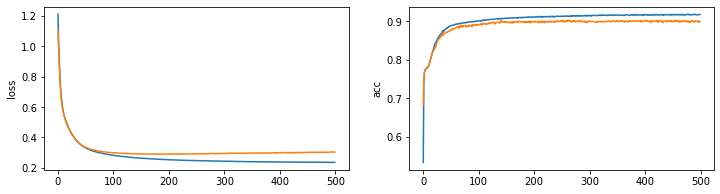

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("loss")
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("acc")

In [22]:
from sklearn.metrics import accuracy_score
print(f"train acc: {accuracy_score(y_train,model.predict_classes(X_train))}")
print(f"val acc: {accuracy_score(y_val,model.predict_classes(X_val))}")
print(f"test acc: {accuracy_score(y_test,model.predict_classes(X_test))}")

train acc: 0.9180159101544221
val acc: 0.9004491017964071
test acc: 0.8943820224719101
